--- Step 4.1: Anomaly Detection & Business Insights ---
Detected 17 anomalies in the test period.


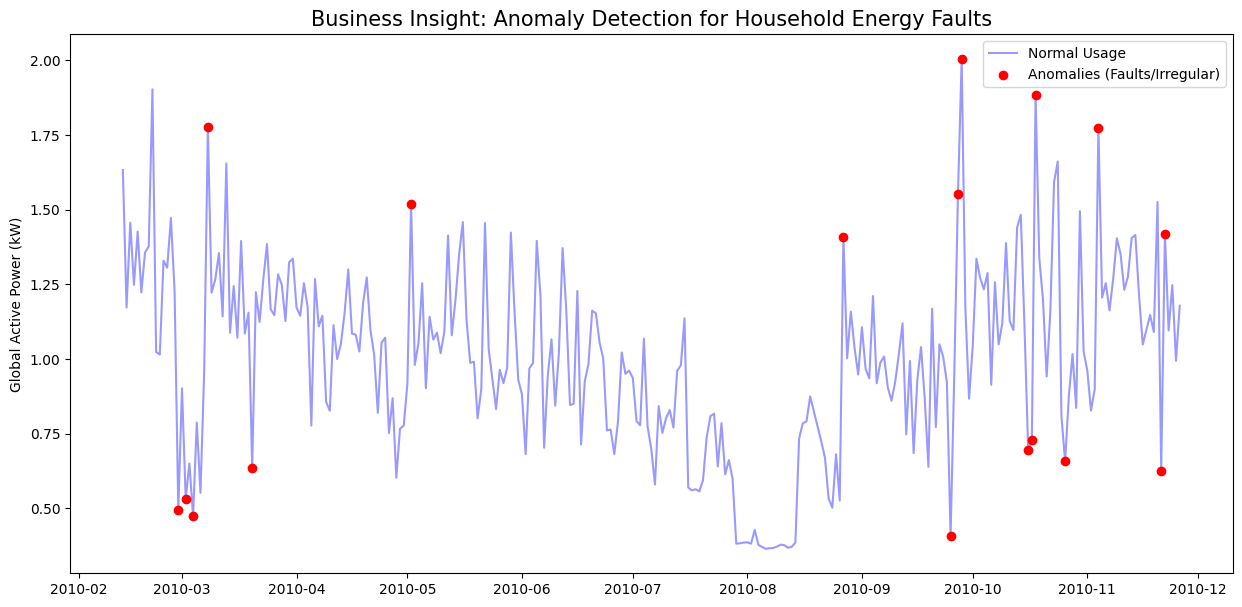


BUSINESS INSIGHTS:
- The model's average prediction error is 0.15 kW.
- Action: Homeowners should be alerted when usage exceeds 0.43 kW beyond prediction.
- These anomalies (red dots) represent opportunities for energy saving or appliance repair.


In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

def run_business_insights():
    print("--- Step 4.1: Anomaly Detection & Business Insights ---")
    
    # 1. Load data and tuned model
    df = pd.read_csv('final_features_pro.csv', index_col='dt', parse_dates=True)
    model = joblib.load('final_model_tuned.pkl')
    scaler = joblib.load('data_scaler.pkl')
    
    # 2. Prepare test data (the last 20%)
    X = df.drop(columns=['Global_active_power'])
    y = df['Global_active_power']
    split = int(len(df) * 0.8)
    X_test_raw, y_test = X.iloc[split:], y.iloc[split:]
    
    # 3. Predict
    X_test_scaled = scaler.transform(X_test_raw)
    y_pred = model.predict(X_test_scaled)
    
    # 4. Anomaly Detection (Requirement: "Identify irregular patterns")
    # We calculate the "Error" (Residual) for every day
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
    results['Error'] = results['Actual'] - results['Predicted']
    
    # We define an anomaly as an error greater than 2 Standard Deviations
    threshold = results['Error'].std() * 2
    results['Is_Anomaly'] = results['Error'].abs() > threshold
    
    anomalies = results[results['Is_Anomaly'] == True]
    print(f"Detected {len(anomalies)} anomalies in the test period.")

    # 5. Visualization: Anomaly Plot
    plt.figure(figsize=(15, 7))
    plt.plot(results.index, results['Actual'], label='Normal Usage', color='blue', alpha=0.4)
    plt.scatter(anomalies.index, anomalies['Actual'], color='red', label='Anomalies (Faults/Irregular)', zorder=5)
    plt.title('Business Insight: Anomaly Detection for Household Energy Faults', fontsize=15)
    plt.ylabel('Global Active Power (kW)')
    plt.legend()
    plt.savefig('business_anomaly_detection.png')
    plt.show()

    # 6. Business Recommendation Insight
    avg_error = results['Error'].abs().mean()
    print(f"\nBUSINESS INSIGHTS:")
    print(f"- The model's average prediction error is {avg_error:.2f} kW.")
    print(f"- Action: Homeowners should be alerted when usage exceeds {threshold:.2f} kW beyond prediction.")
    print("- These anomalies (red dots) represent opportunities for energy saving or appliance repair.")

if __name__ == "__main__":
    run_business_insights()